<a href="https://colab.research.google.com/github/vijaykriishna/geospatial_analysis/blob/master/first_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install --upgrade geopandas

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.8.1)


### 1) Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [18]:
import geopandas as gpd

loans_filepath = "/content/input/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

# Uncomment to view the first five rows of the data
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


### 2) Plot the data.

Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.

In [19]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.

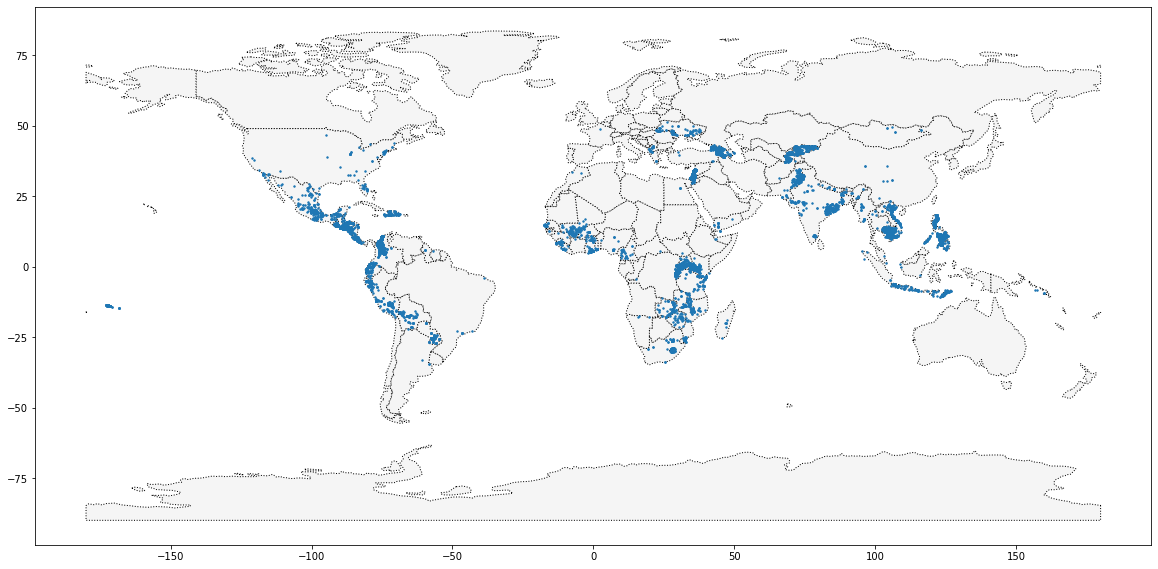

In [20]:
# Your code here
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)

### 3) Select loans based in the Philippines.

Next, you'll focus on loans that are based in the Philippines.  Use the next code cell to create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

In [21]:
# Your code here
PHL_loans = world_loans.loc[world_loans.country=="Philippines"].copy()

### 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [22]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("/content/input/Philippines_AL258.kml", driver='KML')
PHL.head()

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

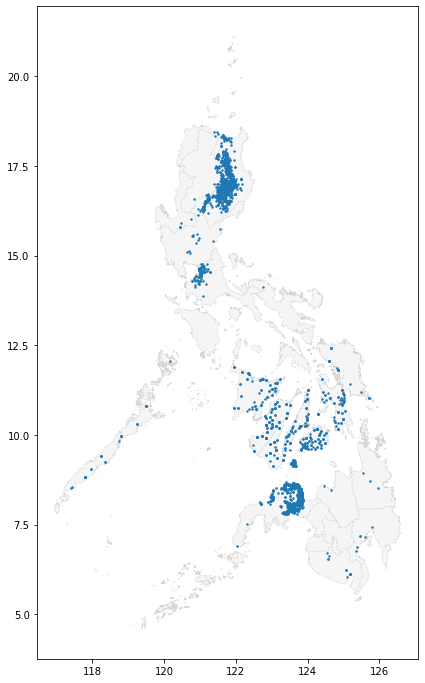

In [23]:
# Your code here
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax=ax, markersize=2)

Can you identify any islands where it might be useful to recruit new Field Partners?  Do any islands currently look outside of Kiva's reach?

Solution: There are a number of potential islands, but Mindoro (in the central part of the Philippines) stands out as a relatively large island without any loans in the current dataset. This island is potentially a good location for recruiting new Field Partners!